In [1]:
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-295.67038, shape=(), dtype=float32)


기본적으로 머신러닝에서는 tensor라는게 기본적으로 쓰인다

텐서는 데이터를 다루기 위한 컨테이너(임의의 차원의 개수)

리스트끼리는 연산이 안된다. 그룹간의 연산이 되지 않아서 numpy를 사용한다

In [2]:
import numpy as np

x = np.array([12])

[] 괄호를 늘리면 차원이 추가된다

[]의 갯수 당 표현할 수 있는 속성의 갯수가 정해진다

In [3]:
print(x) # 하나의 점이다
print(x.ndim)

[12]
1


In [4]:
x = np.array([[12, 13, 14],
             [15, 16, 17],
             [18, 19, 20]])
print(x)
print(x.ndim)

[[12 13 14]
 [15 16 17]
 [18 19 20]]
2


In [5]:
x = np.array([[[12, 13, 14],
             [15, 16, 17],
             [18, 19, 20]],
             [[12, 13, 14],
             [15, 16, 17],
             [18, 19, 20]]])
print(x)
print(x.ndim)

[[[12 13 14]
  [15 16 17]
  [18 19 20]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]]]
3


In [6]:
from tensorflow import keras

from tensorflow.keras.datasets import mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
print(train_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [9]:
print(train_images.ndim)
train_images.dtype

3


dtype('uint8')

In [10]:
train_images.shape 

(60000, 28, 28)

In [11]:
digit = train_images[4]

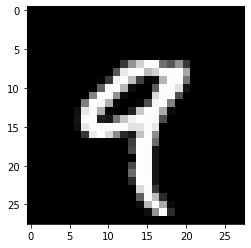

In [12]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap='gray')

In [13]:
my_slice = train_images[:100]

In [14]:
my_slice.shape

(100, 28, 28)

In [15]:
my_slice[:100, 14:, 14:].shape

(100, 14, 14)

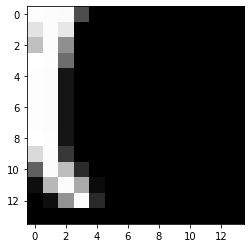

In [16]:
my_slice = train_images[:, 14:, 14:]
plt.imshow(my_slice[4], cmap='gray')

# 배치 데이터

In [17]:
batch = train_images[:128] # 크기가 128인 배치데이터

In [18]:
batch = train_images[128:256]

In [19]:
# n번째 배치
n = 3
batch = train_images[128*n:128*(n+1)]

# 딥러닝에 사용하는 모든 텐서들의 첫번째 축은 샘플 데이터(샘플 차원이다)이다
# 배치를 왜하는건가 --> 한번에 처리하기에는 용량과 시간의 제한 때문에 작은 배치 사이즈로 나누어 계산한다

# 2차원: 벡터 데이터
__`(samples, features)`__

# 3차원: 시계열 데이터, sequence data
__`(smaples, timestamps, features)`__

# 4차원:  영상 데이터
__`(samples, height, width, channels)` channels --> layer의 갯수__  텐서 플로우에서 쓰는 방법

__`(samples, channels, height, width)`__ pytorch, theano에서 쓰는 방법

# 5차원: 동영상
__`(samples, frames, height, width, channels)`__

# 회귀 분석 연습

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import numpy as np

study_time = np.array([1, 2, 3, 4, 5, 6]) # 6개의 x데이터
score = np.array([10, 21, 30, 40, 51, 60]) # 6개의 y데이터

In [21]:
model = Sequential()
# Dense: 입력값과 출력값을 연결해줌
model.add(Dense(1, input_dim=1, activation='linear'))

In [22]:
sgd = optimizers.SGD(learning_rate=0.01) # learning_rate: 학습률 SGD: 경사하강법의 종류
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy']) 

In [23]:
model.fit(study_time, score, epochs=100, batch_size=1, shuffle=False)

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 499.9854 - accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 2.3814 - accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 1.3759 - accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 1.3659 - accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 1.3221 - accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 1.2781 - accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 1.2359 - accuracy: 0.0000e+00
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1956 - accuracy: 0.0000e+00
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1572 - accuracy: 0.0000e+00
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1204 - accuracy

6/6 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.0000e+00
Epoch 82/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.0000e+00
Epoch 83/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.0000e+00
Epoch 84/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.0000e+00
Epoch 85/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.0000e+00
Epoch 86/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.0000e+00
Epoch 87/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.0000e+00
Epoch 88/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.0000e+00
Epoch 89/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.0000e+00
Epoch 90/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.00

모델 학습이 완료됨

<bs>

In [24]:
print('예측결과:', model.predict([7]))
print('파라미터 수:', model.count_params())

예측결과: [[70.03967]]
파라미터 수: 2


In [25]:
# n = 6 --> 1, 2, 3, 4, 5, 6
import random as r

X1 = np.array([1, 2, 3, 4, 5, 6]) # 6개의 x데이터
X2 = np.array([r.randint(1, 10) for i in range(6)])
X3 = np.array([r.randint(1, 10) for i in range(6)])
X4 = np.array([r.randint(1, 10) for i in range(6)])
X5 = np.array([r.randint(1, 10) for i in range(6)])
X6 = np.array([r.randint(1, 10) for i in range(6)])
y = np.array([10, 21, 30, 40, 51, 60]) # 6개의 y데이터 예를 들어 이렇게 있을 때

In [26]:
model = Sequential()
model.add(Dense(1, input_dim=6, activation='linear'))

In [27]:
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

In [28]:
model.count_params() # 왜 7이 나올까?

7

<bs>

# boston 집값 예측

- 데이터 로드 및 train/test set 분리

In [1]:
from tensorflow.keras.datasets import boston_housing # 주택가격을 예측하는 건데 데이터에 이상한 값들이 많이 들어 있다

(train_datas, train_targets), (test_datas, test_targets) = boston_housing.load_data()

In [2]:
print(train_datas.shape)
print(train_targets.shape)

(404, 13)
(404,)


In [3]:
print(test_datas.shape)
print(test_targets.shape)

(102, 13)
(102,)


In [4]:
print(train_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

## 모델 생성

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

model1 = Sequential()
# Dense: 입력값과 출력값을 연결해줌
model1.add(Dense(1, input_dim=13, activation='linear'))
# add로 모델층을 sequential하게 생성

`예시: Dense(1, input_dim=13, init='uniform', activation='linear')`

- 첫번째 인자 : 출력 뉴런의 수를 설정합니다.
- input_dim : 입력 뉴런의 수를 설정합니다.
- init : 가중치 초기화 방법 설정합니다.
    - ‘uniform’ : 균일 분포
    - ‘normal’ : 가우시안 분포
- activation : 활성화 함수 설정합니다.
    - ‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
    - ‘relu’ : rectifier 함수, 은닉층에 주로 쓰입니다.
    - ‘sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
    - ‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

In [6]:
from tensorflow.keras import optimizers

sgd = optimizers.SGD(learning_rate=0.01) # learning_rate: 학습률 SGD: 경사하강법의 종류
model1.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [7]:
model1.count_params()

14

# data scaling

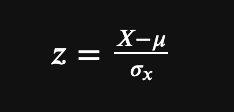

In [8]:
mean = train_datas.mean(axis=0) # 각 행의 평균을 더함
train_datas -= mean
std = train_datas.std(axis=0)
train_datas /= std # 이렇게 하면 표준화가 완료

test_datas -= mean
test_datas /= std

In [14]:
# train_datas.std()
train_datas.mean()

2.602301889250862e-15

In [10]:
from tensorflow.keras import backend as K
K.clear_session()

In [11]:
model1.fit(train_datas, train_targets, epochs=100, batch_size=1, shuffle=False)

Epoch 1/100
404/404 [==============================] - 1s 2ms/step - loss: 572.4506 - accuracy: 0.0000e+00
Epoch 2/100
404/404 [==============================] - 1s 2ms/step - loss: 551.3260 - accuracy: 0.0000e+00
Epoch 3/100
404/404 [==============================] - 1s 2ms/step - loss: 531.2243 - accuracy: 0.0000e+00
Epoch 4/100
404/404 [==============================] - 1s 1ms/step - loss: 512.0112 - accuracy: 0.0000e+00
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 493.5910 - accuracy: 0.0000e+00
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 475.8828 - accuracy: 0.0000e+00: 0s - loss: 484.0890 - accuracy: 0.0000e+
Epoch 7/100
404/404 [==============================] - 1s 2ms/step - loss: 458.8196 - accuracy: 0.0000e+00
Epoch 8/100
404/404 [==============================] - 1s 1ms/step - loss: 442.3458 - accuracy: 0.0000e+00
Epoch 9/100
404/404 [==============================] - 1s 2ms/step - loss: 426.4153 - accuracy: 0.0000

404/404 [==============================] - 1s 2ms/step - loss: 33.3454 - accuracy: 0.0000e+00
Epoch 77/100
404/404 [==============================] - 1s 1ms/step - loss: 32.8608 - accuracy: 0.0000e+00
Epoch 78/100
404/404 [==============================] - 1s 2ms/step - loss: 32.4048 - accuracy: 0.0000e+00
Epoch 79/100
404/404 [==============================] - 1s 2ms/step - loss: 31.9751 - accuracy: 0.0000e+00
Epoch 80/100
404/404 [==============================] - 1s 2ms/step - loss: 31.5700 - accuracy: 0.0000e+00
Epoch 81/100
404/404 [==============================] - 1s 2ms/step - loss: 31.1876 - accuracy: 0.0000e+00 0s - loss: 84.9508 - accurac
Epoch 82/100
404/404 [==============================] - 1s 2ms/step - loss: 30.8266 - accuracy: 0.0000e+00
Epoch 83/100
404/404 [==============================] - 1s 1ms/step - loss: 30.4856 - accuracy: 0.0000e+00
Epoch 84/100
404/404 [==============================] - 1s 2ms/step - loss: 30.1632 - accuracy: 0.0000e+00
Epoch 85/100
404/404 

In [12]:
model1.evaluate(test_datas, test_targets, verbose=0)

[19.85296630859375, 0.0]

In [13]:
print('예측결과:', model1.predict(test_datas))
model1.evaluate(test_datas, test_targets)

예측결과: [[ 7.318431 ]
 [21.504692 ]
 [21.747858 ]
 [28.513552 ]
 [25.354584 ]
 [21.542995 ]
 [28.859655 ]
 [24.485899 ]
 [18.060617 ]
 [22.106192 ]
 [19.785843 ]
 [19.38522  ]
 [17.49494  ]
 [34.97201  ]
 [16.949728 ]
 [20.93972  ]
 [24.761902 ]
 [23.960999 ]
 [19.522312 ]
 [20.798254 ]
 [ 9.918771 ]
 [13.489399 ]
 [22.125803 ]
 [14.362801 ]
 [21.488785 ]
 [22.566572 ]
 [28.012121 ]
 [24.843893 ]
 [11.871592 ]
 [21.903282 ]
 [24.266825 ]
 [16.342178 ]
 [29.580158 ]
 [23.573954 ]
 [17.188728 ]
 [ 4.0914593]
 [17.080849 ]
 [22.125307 ]
 [19.261024 ]
 [26.710484 ]
 [24.951782 ]
 [28.37234  ]
 [18.01194  ]
 [34.469124 ]
 [30.051683 ]
 [23.95211  ]
 [28.292515 ]
 [19.0627   ]
 [23.584774 ]
 [24.007538 ]
 [29.185194 ]
 [19.05264  ]
 [ 9.701149 ]
 [15.157959 ]
 [33.411015 ]
 [27.63258  ]
 [17.126953 ]
 [39.15773  ]
 [30.424261 ]
 [25.235832 ]
 [25.26264  ]
 [20.270622 ]
 [17.16486  ]
 [22.317509 ]
 [25.280083 ]
 [23.799562 ]
 [17.571136 ]
 [25.534986 ]
 [ 6.589058 ]
 [10.068951 ]
 [21.322521 ]


[19.85296630859375, 0.0]